# Home Exercise on Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data dowloading

+ If you running on kaggle kernel just add input the titanic dataset, else run the other 4 command in comment block

In [2]:
# test = pd.read_csv("../input/titanic/test.csv")
# train = pd.read_csv("../input/titanic/train.csv")

!gdown 1-E2Ux0BUkF4M-I8dCXKTZ-UYnUQ2AnUf -O titanic.zip
!unzip titanic.zip
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

Downloading...
From: https://drive.google.com/uc?id=1-E2Ux0BUkF4M-I8dCXKTZ-UYnUQ2AnUf
To: /content/titanic.zip
100% 34.9k/34.9k [00:00<00:00, 46.8MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
test2 = test.copy()

In [4]:
age_ref = pd.DataFrame(data=[train.groupby('Pclass')['Age'].mean()],columns=train['Pclass'].unique())
age_ref

,3,1,2
Age,25.14062,38.233441,29.87763


# Define some function

In [5]:
def fill_age(pclass,age):
    if pd.isnull(age):
        return float(age_ref[pclass])
    else:
        return age

def fill_fare(fare):
    if pd.isnull(fare):
        return train['Fare'].mean()
    else:
        return fare

def fill_embark(embark):
    if pd.isnull(embark):
        return train['Embarked'].mode().iloc[0]
    else:
        return embark

In [6]:
data_cleaner = [train, test]

In [7]:
for data in data_cleaner:
    data['Age'] = train.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)
    data['Fare'] = train.apply(lambda x: fill_fare(x['Fare']), axis=1)
    data['Embarked'] = train.apply(lambda x: fill_embark(x['Embarked']), axis=1)

<ipython-input-5-22bdd109365e>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(age_ref[pclass])


In [8]:
title_list = list()
for data in data_cleaner:
    for title in data['Name']:
        title = title.split('.')[0].split(',')[1]
        title_list.append(title)

    data['title'] = title_list
    title_list = list()


In [9]:
print(train['title'])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object


In [10]:
train['title'] = train['title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
train['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Others,27


In [11]:
test['title'] = test['title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer',' Dona'], 'Others')
test['title'].value_counts()

,count
title,
Mr,240
Miss,78
Mrs,72
Master,21
Others,7


In [12]:
def get_size(df):
    if df['SibSp'] + df['Parch'] + 1 == 1:
        return 'Single'
    if df['SibSp'] + df['Parch'] + 1 > 1:
        return 'Small'
    if df['SibSp'] + df['Parch'] + 1 > 4:
        return 'Big'

In [13]:
for data in data_cleaner:
    data['FamilySize'] = data.apply(get_size,axis=1)

In [14]:
for data in data_cleaner:

    data['IsAlone'] = 1 #initialize to yes/1 is alone
    data['IsAlone'].loc[data['FamilySize'] != 'Single'] = 0

<ipython-input-14-ffe437907b26>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IsAlone'].loc[data['FamilySize'] != 'Single'] = 0
<ipython-input-14-ffe437907b26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

# Preprocesing and feature engineering the train and test data

In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
Title = pd.get_dummies(train['title'],drop_first=True)
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)
FamilySize = pd.get_dummies(train['FamilySize'],drop_first=True)

sex2 = pd.get_dummies(test['Sex'],drop_first=True)
embark2 = pd.get_dummies(test['Embarked'],drop_first=True)
title2 = pd.get_dummies(test['title'],drop_first=True)
Pclass2 = pd.get_dummies(test['Pclass'],drop_first=True)
FamilySize2 = pd.get_dummies(test['FamilySize'],drop_first=True)


In [16]:
for data in data_cleaner:
    data.drop(['Sex','Embarked','Name','Ticket','PassengerId','title','FamilySize','Cabin'],axis=1,inplace=True)


In [17]:
train = pd.concat([sex,embark,train,Title,FamilySize],axis=1)
test = pd.concat([sex2,embark2,test,title2,FamilySize2],axis=1)

In [18]:
X = train.drop('Survived',axis=1)
y = train['Survived']


In [19]:
#y = y.values

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
test = scaler.transform(test)

# Build and train model

In [21]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.005, iterations=11000, lambda_=2.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # Add bias term
        self.theta = np.zeros(n + 1)

        for _ in range(self.iterations):
            predictions = self.sigmoid(X.dot(self.theta))
            errors = predictions - y
            gradient = (7.5 / m) * X.T.dot(errors) + (self.lambda_ / m) * np.r_[0, self.theta[1:]]  # Ridge Regularization
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        m = X.shape[0]
        X = np.c_[np.ones(m), X]  # Add bias term
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [1 if i > 0.507 else 0 for i in probabilities]

model = LogisticRegressionCustom()
model.fit(X, y)
predictions2 = model.predict(test)
f = [int(x) for x in predictions2]


# Generate the csv file

In [22]:
output = pd.DataFrame({'PassengerId': test2['PassengerId'], 'Survived': f})
output.to_csv('submission.csv', index=False)

# Image of submission

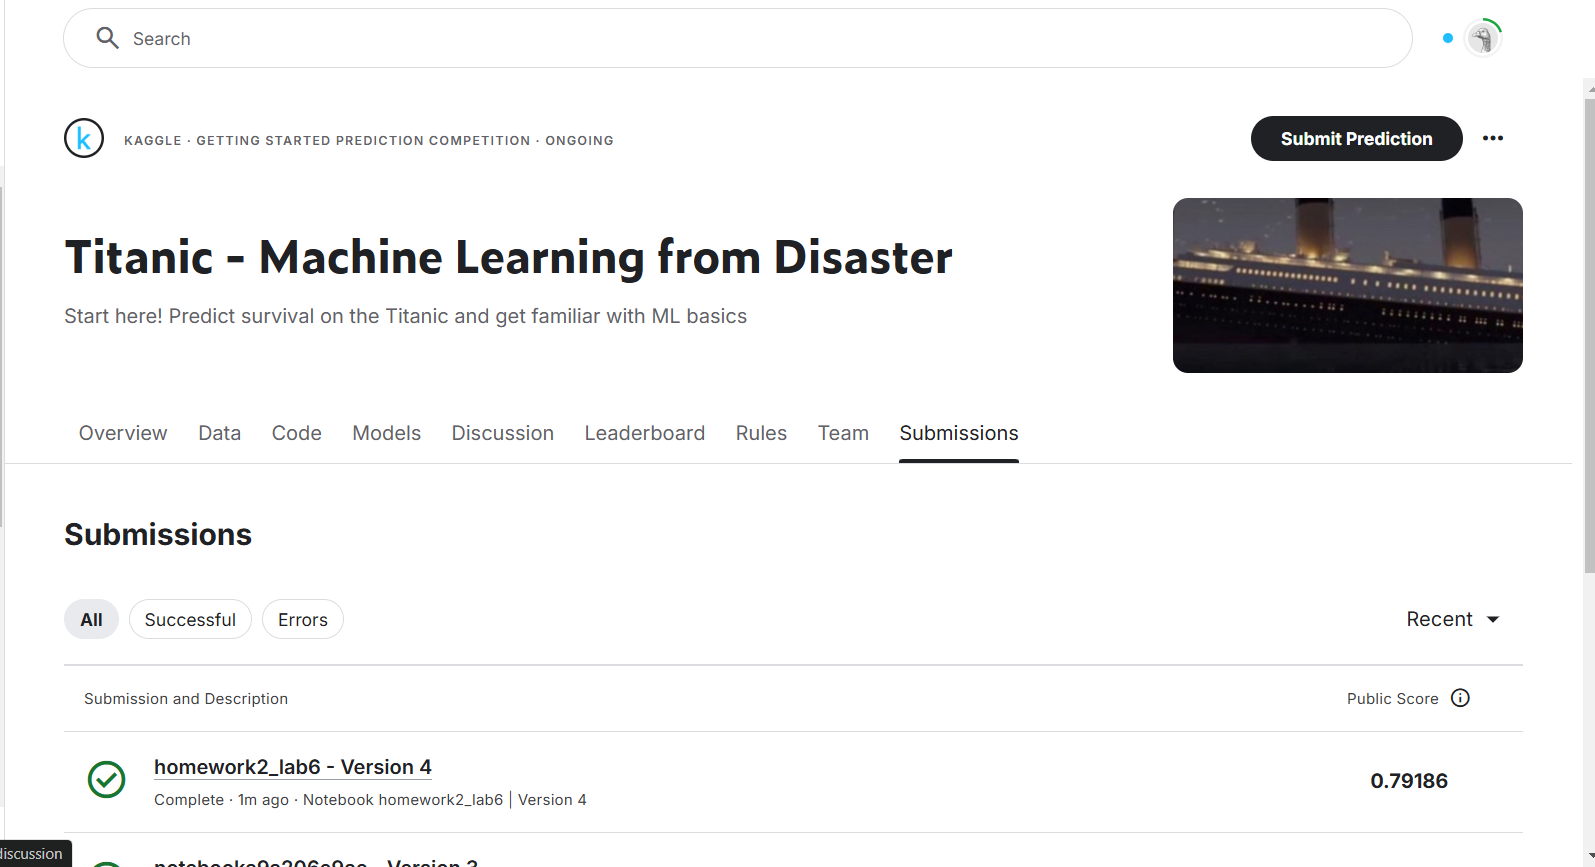